# Sep 29th, 2022 (Generate data Fig 2E, Fig 3)

**Motivation**: Export as pd df  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Fig dir

In [2]:
nn = 512
perc = 15
fig_dir = 'DataExport'
fig_dir = pjoin(fig_base_dir, 'paper2.0', f'n{nn}-p{perc}', fig_dir)
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

merge_thres = {
    128: 0.376,
    512: 0.444,
}
kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 600,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/DataExport

## Prepare

In [3]:
mice = Mice(nn)
kwargs = {
    'mice': mice,
    'perc': perc,
    'num_k': None,
    'merge_thres': None,
    'n_resamples': int(1e5),
    'bin_edges': (0.2, 1),
    'n_cuts': 4,
}

## Propotion data

### Results $(K = 7)$

In [4]:
%%time

num_k = 7
kwargs['num_k'] = num_k
kwargs['merge_thres'] = merge_thres[512]

results = proportion_results(**kwargs)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 46min 48s, sys: 8min 20s, total: 55min 9s
Wall time: 55min 10s


['bt_dict', 'props_bo', 'props_ca', 'pi_sorted', 'df', 'bins']

### Show OCs

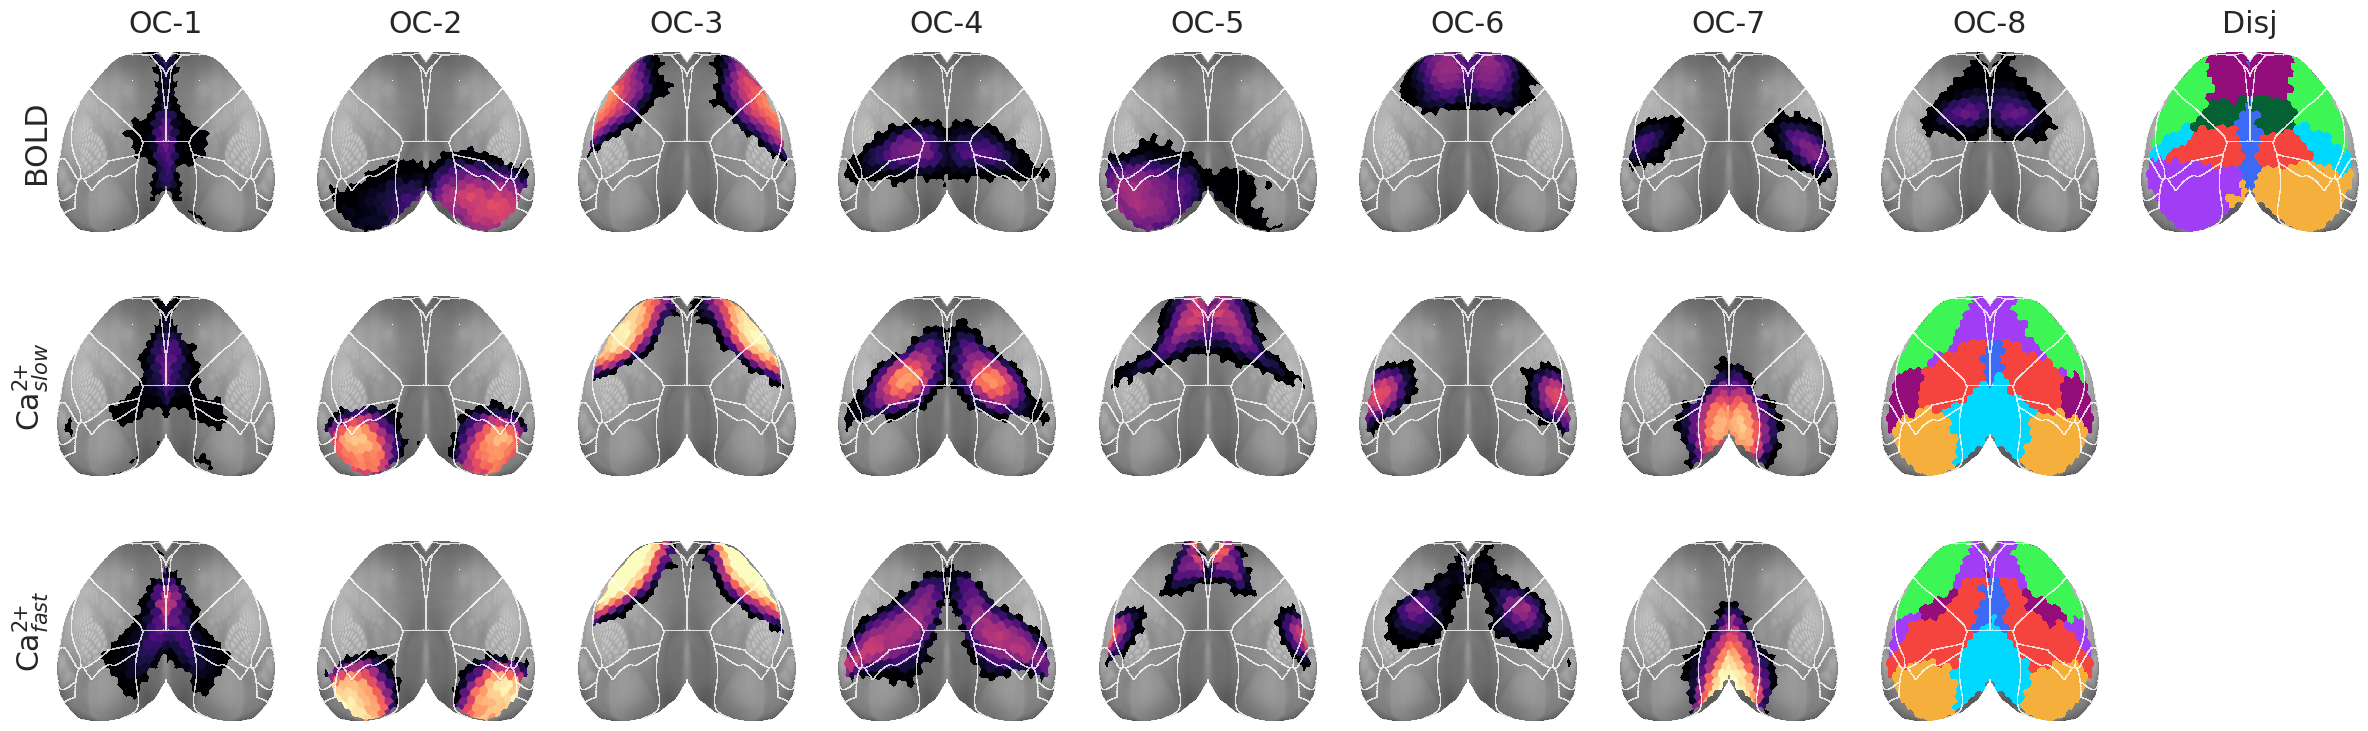

In [5]:
_ = bt.show(
    data={
        mode: avg(o.run_pi) for mode, o
        in results['bt_dict'].items()},
    **show_kws(num_k),
)

### Propotion plot

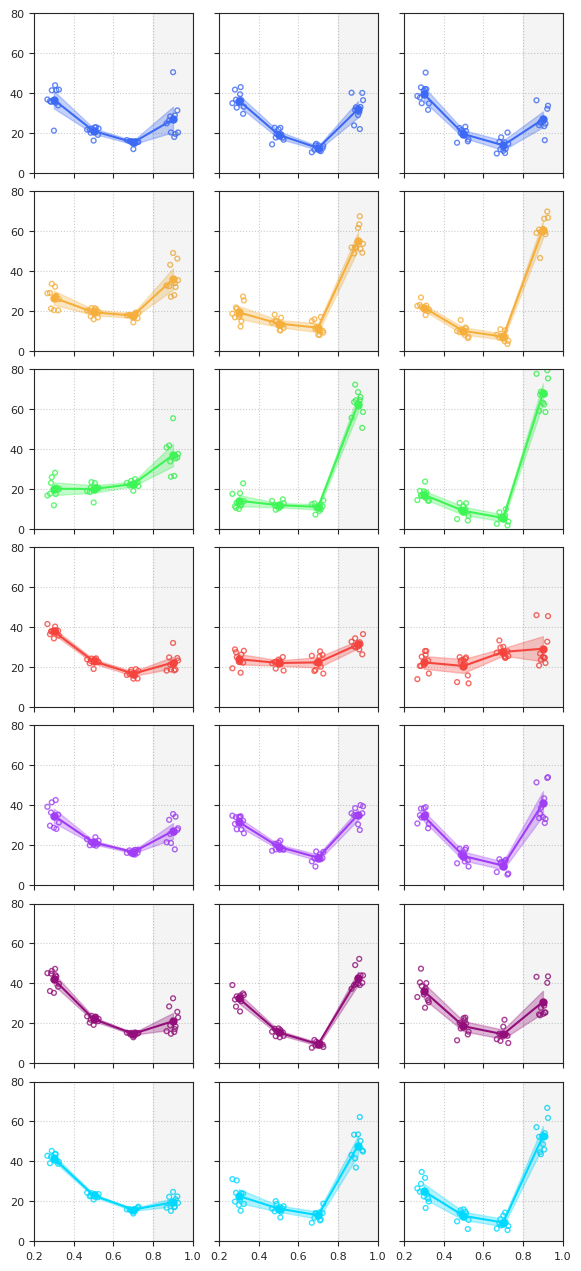

In [6]:
from figures.fig_prop import proportions_line as go
fig, _ = go(results['df'], results['bins'])

# fig.savefig(pjoin(fig_dir, f'prop_ln_K{num_k}.pdf'), **kws_fig)
# fig.savefig(pjoin(fig_dir, f'props_ln_K{num_k}.png'), **kws_fig)

### Export df

In [7]:
results['df']

,mode,oc_idx,subject,interval,x,y,se
0,BOLD,1,sub-SLC01,"(0.2, 0.4]",0.3,41.492715,1.928838
1,BOLD,2,sub-SLC01,"(0.2, 0.4]",0.3,27.663289,1.547027
2,BOLD,3,sub-SLC01,"(0.2, 0.4]",0.3,20.770533,1.406014
3,BOLD,4,sub-SLC01,"(0.2, 0.4]",0.3,37.657186,0.621531
4,BOLD,5,sub-SLC01,"(0.2, 0.4]",0.3,28.191059,1.562168
...,...,...,...,...,...,...,...
919,Ca$^{2\!\!+}_{fast}$,3,group,"(0.8, 1.0]",0.9,68.020585,2.249482
920,Ca$^{2\!\!+}_{fast}$,4,group,"(0.8, 1.0]",0.9,29.269927,2.785759
921,Ca$^{2\!\!+}_{fast}$,5,group,"(0.8, 1.0]",0.9,40.959380,2.727941
922,Ca$^{2\!\!+}_{fast}$,6,group,"(0.8, 1.0]",0.9,30.779125,2.452376


In [8]:
results['df'].loc[
    results['df']['subject'] != 'group',
    'se'
] = np.nan

In [9]:
results['df'].loc[
    (results['df']['x'] == 0.9) &
    (results['df']['oc_idx'] == 1) &
    (results['df']['mode'] == 'BOLD')
]

,mode,oc_idx,subject,interval,x,y,se
21,BOLD,1,sub-SLC01,"(0.8, 1.0]",0.9,19.572471,NaN
49,BOLD,1,sub-SLC02,"(0.8, 1.0]",0.9,28.326330,NaN
77,BOLD,1,sub-SLC03,"(0.8, 1.0]",0.9,31.365123,NaN
105,BOLD,1,sub-SLC04,"(0.8, 1.0]",0.9,20.340532,NaN
133,BOLD,1,sub-SLC05,"(0.8, 1.0]",0.9,24.887956,NaN
161,BOLD,1,sub-SLC06,"(0.8, 1.0]",0.9,26.306037,NaN
189,BOLD,1,sub-SLC07,"(0.8, 1.0]",0.9,28.847578,NaN
217,BOLD,1,sub-SLC08,"(0.8, 1.0]",0.9,50.520111,NaN
245,BOLD,1,sub-SLC09,"(0.8, 1.0]",0.9,18.069641,NaN
273,BOLD,1,sub-SLC10,"(0.8, 1.0]",0.9,20.311031,NaN


In [10]:
results['df']

,mode,oc_idx,subject,interval,x,y,se
0,BOLD,1,sub-SLC01,"(0.2, 0.4]",0.3,41.492715,NaN
1,BOLD,2,sub-SLC01,"(0.2, 0.4]",0.3,27.663289,NaN
2,BOLD,3,sub-SLC01,"(0.2, 0.4]",0.3,20.770533,NaN
3,BOLD,4,sub-SLC01,"(0.2, 0.4]",0.3,37.657186,NaN
4,BOLD,5,sub-SLC01,"(0.2, 0.4]",0.3,28.191059,NaN
...,...,...,...,...,...,...,...
919,Ca$^{2\!\!+}_{fast}$,3,group,"(0.8, 1.0]",0.9,68.020585,2.249482
920,Ca$^{2\!\!+}_{fast}$,4,group,"(0.8, 1.0]",0.9,29.269927,2.785759
921,Ca$^{2\!\!+}_{fast}$,5,group,"(0.8, 1.0]",0.9,40.959380,2.727941
922,Ca$^{2\!\!+}_{fast}$,6,group,"(0.8, 1.0]",0.9,30.779125,2.452376


In [11]:
_ = save_obj(
    obj=results['df'],
    file_name='props',
    save_dir=fig_dir,
    verbose=True,
    mode='df',
)

[PROGRESS] 'props.df' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/DataExport

## Similarity data

### Results $(K = 7)$

In [12]:
%%time

results = similiarity_results(
    mice=mice,
    perc=perc,
    num_k=num_k,
    merge_thres=0.444,
    n_resamples=int(1e4),
)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 5min 27s, sys: 17.8 s, total: 5min 45s
Wall time: 5min 45s


[
    'bt_dict',
    'props_bo',
    'props_ca',
    'pi_sorted',
    'sim',
    'sim_overall',
    'sim_b',
    'sim_overall_b',
    'good_runs',
    'sim_run',
    'sim_run_overall',
    'tests',
    'tests_overall'
]

### Show OCs

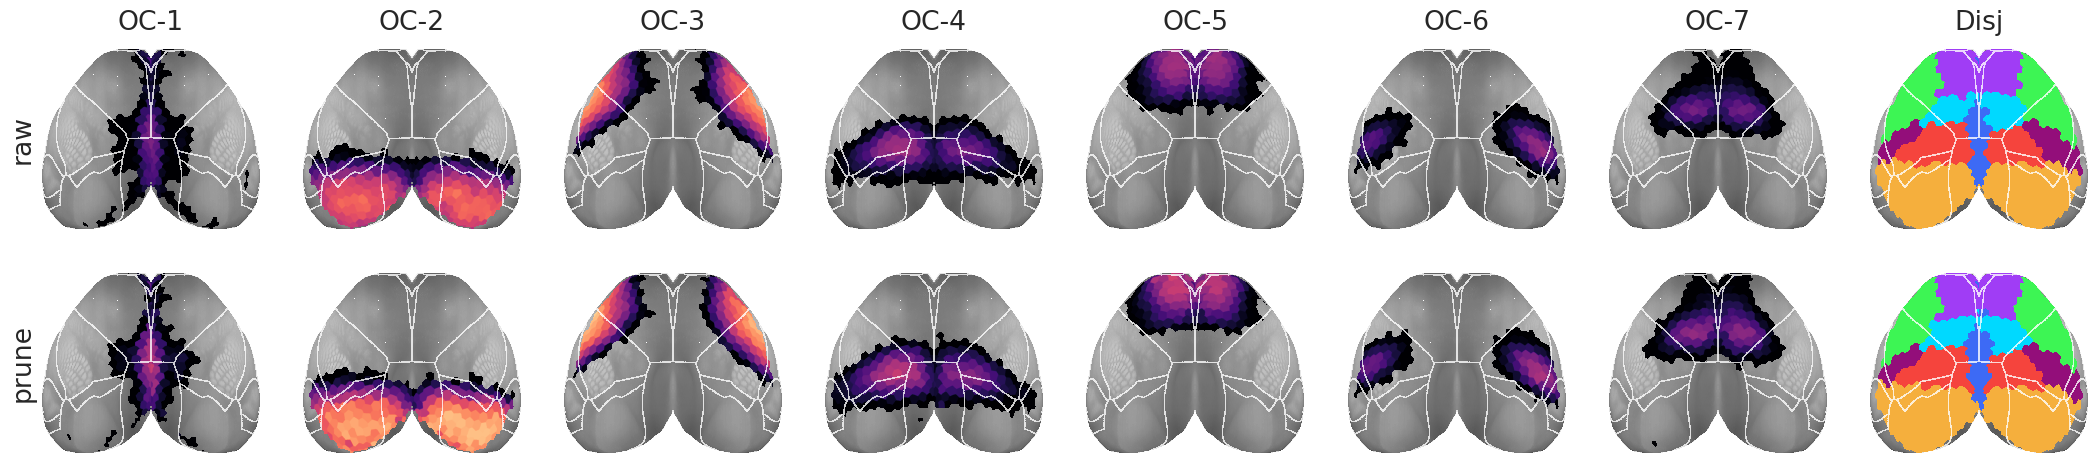

In [13]:
_ = bt.show(
    data={
        'raw': avg(results['bt_dict'][BOLD].run_pi),
        'prune': avg(results['bt_dict'][BOLD].pi_prune)},
    **show_kws(num_k),
)

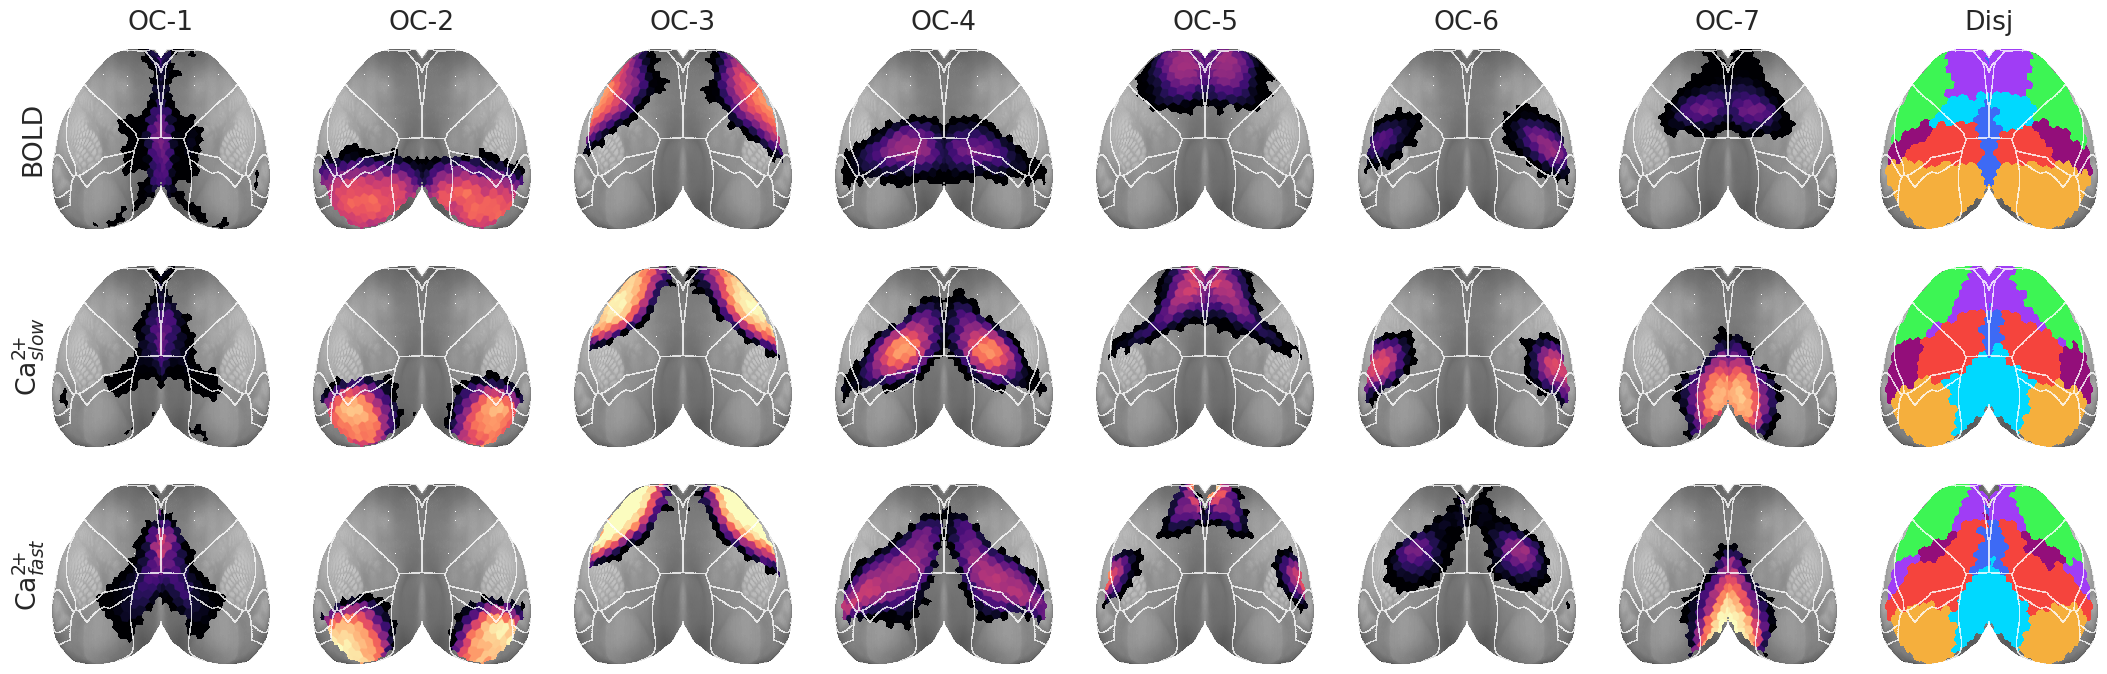

In [14]:
_ = bt.show(results['pi_sorted'], **show_kws(num_k))

### Plot point

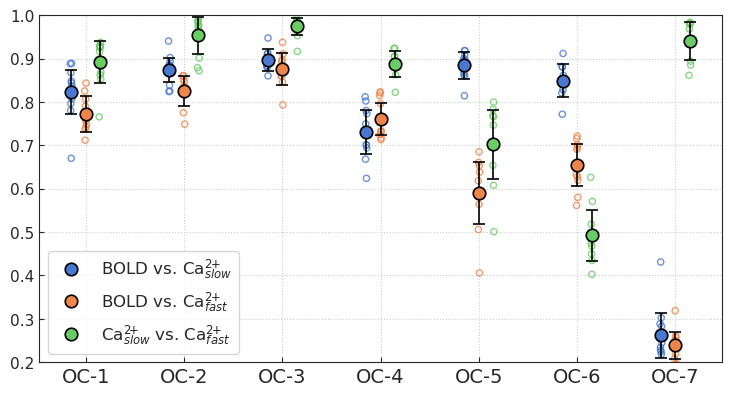

In [15]:
from figures.fig_ocs import similarity_point as go
fig, _ = go(results, False)

# fig.savefig(pjoin(save_dir, 'sim_pt.pdf'), **kws_fig)
# fig.savefig(pjoin(save_dir, 'sim_pt.png'), **kws_fig)

In [16]:
from figures.fig_ocs import _scores_arr, _cond_label

scores, std_err = _scores_arr(results, overall=False)
scores.shape, std_err.shape

((10, 7, 3), (7, 3))

In [17]:
df = []
for ii, lbl in enumerate(results['sim']):
    for kk in range(num_k):
        for ss in range(len(scores)):
            df.append({
                'label': [_cond_label(lbl)],
                'oc_idx': [kk + 1],
                'subject': [mice.get_key(ss + 1)],
                'score': [scores[ss, kk, ii]],
                'se': [np.nan],
            })
        df.append({
            'label': [_cond_label(lbl)],
            'oc_idx': [kk + 1],
            'subject': ['group'],
            'score': [bn.nanmean(scores[:, kk, ii])],
            'se': [std_err[kk, ii]],
        })
df = pd.DataFrame(merge_dicts(df))

In [18]:
df

,label,oc_idx,subject,score,se
0,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC01,0.889198,NaN
1,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC02,0.796290,NaN
2,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC03,0.836650,NaN
3,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC04,0.807870,NaN
4,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC05,0.888088,NaN
...,...,...,...,...,...
226,Ca$^{2\!\!+}_{slow}$ vs. Ca$^{2\!\!+}_{fast}$,7,sub-SLC07,0.980570,NaN
227,Ca$^{2\!\!+}_{slow}$ vs. Ca$^{2\!\!+}_{fast}$,7,sub-SLC08,0.983453,NaN
228,Ca$^{2\!\!+}_{slow}$ vs. Ca$^{2\!\!+}_{fast}$,7,sub-SLC09,0.941366,NaN
229,Ca$^{2\!\!+}_{slow}$ vs. Ca$^{2\!\!+}_{fast}$,7,sub-SLC10,0.932687,NaN


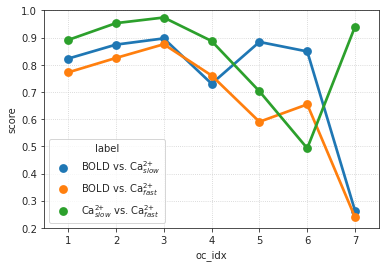

In [19]:
ax = sns.pointplot(
    data=df.loc[df['subject'] == 'group'],
    x='oc_idx',
    y='score',
    hue='label',
)
ax.set_ylim(0.2, 1.0)
ax.grid()
plt.show()

In [20]:
df.loc[df['oc_idx'] == 1]

,label,oc_idx,subject,score,se
0,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC01,0.889198,NaN
1,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC02,0.796290,NaN
2,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC03,0.836650,NaN
3,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC04,0.807870,NaN
4,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC05,0.888088,NaN
5,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC06,0.780476,NaN
6,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC07,0.843628,NaN
7,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC08,0.670026,NaN
8,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC09,0.848168,NaN
9,BOLD vs. Ca$^{2\!\!+}_{slow}$,1,sub-SLC10,0.867314,NaN


In [21]:
_ = save_obj(
    obj=df,
    file_name='sim',
    save_dir=fig_dir,
    verbose=True,
    mode='df',
)

[PROGRESS] 'sim.df' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512-p15/DataExport